## Writing a video using OpenCV
While building applications, it becomes important to save demo videos of your work as well as many applications themselves might require saving a video clip. For example, in a surveiallance application, you might have to save a video clip as soon as you see something unusual happening.

In this notebook, we will describe how to save a video in **avi** and **mp4** formats using openCV.

## Read Video from Source

In [1]:
# import the library
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


source = './race_car.mp4'  # source = 0 for webcam

cap = cv2.VideoCapture(source)

In [2]:
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

### <font color="green">Read and display one frame </font>

In [3]:
ret, frame = cap.read()

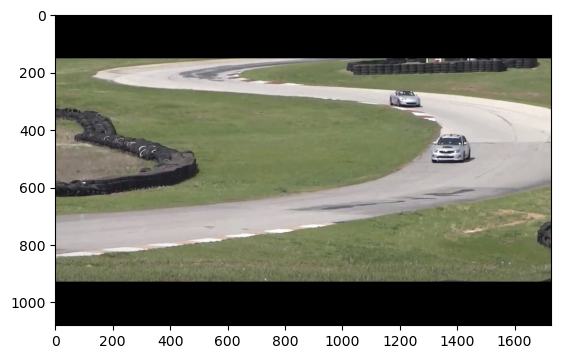

In [4]:
plt.imshow(frame[...,::-1])

### <font color="green">Display the video from file </font>

In [5]:
from IPython.display import HTML
HTML("""
<video width=1024 controls>
  <source src="race_car.mp4" type="video/mp4">
</video>
""")

## Write Video using OpenCV
For writing the video, you need to create a videowriter object with the right parameters.

### <font color="green">Function Syntax</font>
```python
VideoWriter object=   cv.VideoWriter( filename, fourcc, fps, frameSize  )
```
where,
**Parameters**

1. `filename`: Name of the output video file.
2. `fourcc`: 4-character code of codec used to compress the frames. For example, VideoWriter::fourcc('P','I','M','1') is a MPEG-1 codec, VideoWriter::fourcc('M','J','P','G') is a motion-jpeg codec etc. List of codes can be obtained at Video Codecs by FOURCC page. FFMPEG backend with MP4 container natively uses other values as fourcc code: see ObjectType, so you may receive a warning message from OpenCV about fourcc code conversion.
3. `fps`: Framerate of the created video stream.
4. `frameSize`: Size of the video frames.


In [6]:
# Default resolutions of the frame are obtained.
# Convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object.
out_avi = cv2.VideoWriter('race_car_out.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

out_mp4 = cv2.VideoWriter('race_car_out.mp4',cv2.VideoWriter_fourcc(*'XVID'), 10, (frame_width,frame_height))

### <font color="green">Read frames and write to file</font>
We will read the frames from the race-car video and write the same to the two objects we created in the previous step. We should release the objects after the task is complete.

In [7]:
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
    
  if ret == True:
    
    # Write the frame to the output files
    out_avi.write(frame)
    out_mp4.write(frame)
    
  # Break the loop
  else: 
    break

In [8]:
# When everything done, release the VideoCapture and VideoWriter objects
cap.release()
out_avi.release()
out_mp4.release()

## Thank You!